INSTALL AND IMPORT ALL DEPENDENCIES

In [ ]:
# Import the relevant dependencies
!pip install scikit-learn matplotlib numpy pandas


In [ ]:
# Import all required depdendencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

DATA LOADING AND PRE-PROCESSING


In [ ]:
colors_data=pd.read_csv('/content/sample_data/cotton_dyeing_dataset_1000_samples.csv')

# Define the features (input variables) - these are the dyeing parameters
feature_columns = ["dye_red_owf", "dye_green_owf", "dye_blue_owf", "salt_gL", "sodaAsh_gL", "temp_C", "time_min", "pH", "liquor_ratio", "water_hardness_ppm", "soap_temp_C", "soap_time_min"]
colors_data_X = colors_data[feature_columns]

# Define the target variables (output variables) - these are the RGB values
target_columns = ["RGB_R", "RGB_G", "RGB_B"]
colors_data_y = colors_data[target_columns]

# Get the names of the features
colors_data_feature_names = colors_data_X.columns.tolist()

# Create a DataFrame for quick Exploratory Data Analysis (EDA)
# This will combine the features and targets for easy viewing.
df_colors_data = pd.concat([colors_data_X, colors_data_y], axis=1)

In [ ]:
# Visualize the dataset
print("Shape - X:", colors_data_X.shape, " y:", colors_data_y.shape)
print("\nFeature names:", colors_data_feature_names)
print("\nFirst 5 rows:")
display(df_colors_data.head())

Shape - X: (1000, 12)  y: (1000, 3)

Feature names: ['dye_red_owf', 'dye_green_owf', 'dye_blue_owf', 'salt_gL', 'sodaAsh_gL', 'temp_C', 'time_min', 'pH', 'liquor_ratio', 'water_hardness_ppm', 'soap_temp_C', 'soap_time_min']

First 5 rows:


,dye_red_owf,dye_green_owf,dye_blue_owf,salt_gL,sodaAsh_gL,temp_C,time_min,pH,liquor_ratio,water_hardness_ppm,soap_temp_C,soap_time_min,RGB_R,RGB_G,RGB_B
0,4.26,1.70,1.07,78.1,12.2,68,31,10.5,10,292,75,17,38,172,205
1,0.57,4.95,0.68,74.5,10.3,71,52,10.7,13,215,86,26,224,13,226
2,2.23,3.91,2.08,73.6,13.8,73,68,10.0,12,179,70,25,142,55,150
3,3.34,1.66,2.97,41.3,11.3,68,72,10.0,12,258,71,19,66,161,90
4,1.05,4.49,0.41,52.4,10.3,63,57,10.0,15,182,73,29,198,0,231


TRAIN-TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    colors_data_X, colors_data_y,
    test_size=0.2,
    random_state=42
)


print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"Targets: {y_train.shape[1]}")

Training samples: 800
Testing samples: 200
Features: 12
Targets: 3


TRAIN RANDOM FOREST MODEL

In [ ]:


rf_model = RandomForestRegressor(
    n_estimators=200,        # Number of trees
    max_depth=20,            # Maximum depth of trees
    min_samples_split=5,     # Minimum samples to split a node
    min_samples_leaf=2,      # Minimum samples at leaf node
    random_state=42,
    n_jobs=-1,               # Use all CPU cores
    verbose=1
)

rf_model.fit(X_train, y_train)
print("✓ Model training complete!")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s


✓ Model training complete!


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished


MAKE PREDICTIONS

In [ ]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


EVALUATE PERFORMANCE

In [ ]:

# Overall metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"\nOverall Performance:")
print(f"  Training R² Score:   {train_r2:.4f}")
print(f"  Testing R² Score:    {test_r2:.4f}")
print(f"  Testing MAE:         {test_mae:.2f} (RGB units)")
print(f"  Testing RMSE:        {test_rmse:.2f} (RGB units)")

# Check for overfitting
if train_r2 - test_r2 > 0.1:
    print("  ⚠️  Warning: Possible overfitting detected!")
else:
    print("  ✓  Good generalization!")

# Individual RGB channel performance
print(f"\nIndividual Channel Performance:")
for i, color in enumerate(target_columns):
    r2 = r2_score(y_test.iloc[:, i], y_pred_test[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred_test[:, i])
    print(f"  {color:8s} - R²: {r2:.4f} | MAE: {mae:.2f}")


Overall Performance:
  Training R² Score:   0.9870
  Testing R² Score:    0.9611
  Testing MAE:         11.34 (RGB units)
  Testing RMSE:        14.51 (RGB units)
  ✓  Good generalization!

Individual Channel Performance:
  RGB_R    - R²: 0.9614 | MAE: 10.98
  RGB_G    - R²: 0.9553 | MAE: 12.40
  RGB_B    - R²: 0.9666 | MAE: 10.63


FEATURE IMPORTANCE ANALYSIS

In [ ]:

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 5 Most Important Features:")
print(feature_importance.head())


Top 5 Most Important Features:
              Feature  Importance
0         dye_red_owf    0.335812
2        dye_blue_owf    0.334574
1       dye_green_owf    0.317803
9  water_hardness_ppm    0.001729
3             salt_gL    0.001506


VISUALIZATIONS

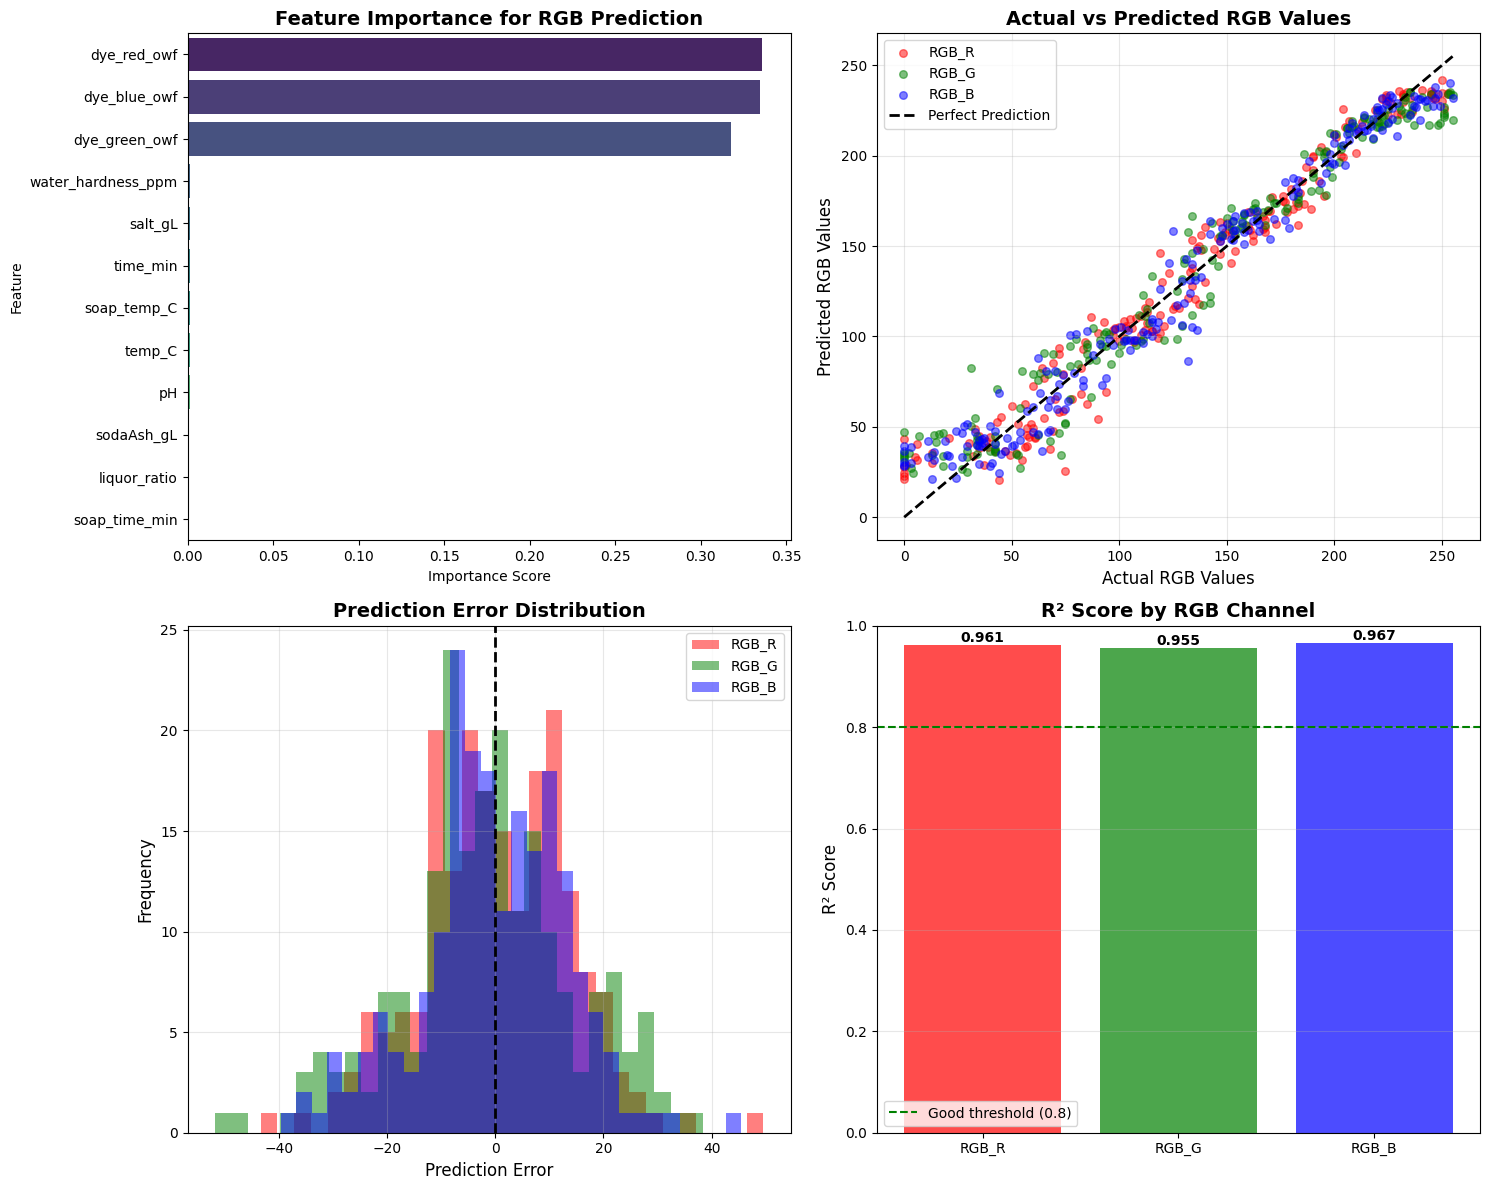

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Feature Importance
ax1 = axes[0, 0]
sns.barplot(data=feature_importance, y='Feature', x='Importance', ax=ax1, palette='viridis')
ax1.set_title('Feature Importance for RGB Prediction', fontsize=14, fontweight='bold')
ax1.set_xlabel('Importance Score')

# Plot 2: Actual vs Predicted for all RGB channels
ax2 = axes[0, 1]
colors_plot = ['red', 'green', 'blue']
for i, (color, color_name) in enumerate(zip(target_columns, colors_plot)):
    ax2.scatter(y_test.iloc[:, i], y_pred_test[:, i],
               alpha=0.5, s=30, c=color_name, label=color)
ax2.plot([0, 255], [0, 255], 'k--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual RGB Values', fontsize=12)
ax2.set_ylabel('Predicted RGB Values', fontsize=12)
ax2.set_title('Actual vs Predicted RGB Values', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Prediction Error Distribution
ax3 = axes[1, 0]
errors = y_test.values - y_pred_test
for i, (color, color_name) in enumerate(zip(target_columns, colors_plot)):
    ax3.hist(errors[:, i], bins=30, alpha=0.5, label=color, color=color_name)
ax3.set_xlabel('Prediction Error', fontsize=12)
ax3.set_ylabel('Frequency', fontsize=12)
ax3.set_title('Prediction Error Distribution', fontsize=14, fontweight='bold')
ax3.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: R² Score by Channel
ax4 = axes[1, 1]
r2_scores = [r2_score(y_test.iloc[:, i], y_pred_test[:, i]) for i in range(3)]
bars = ax4.bar(target_columns, r2_scores, color=colors_plot, alpha=0.7)
ax4.set_ylim([0, 1])
ax4.set_ylabel('R² Score', fontsize=12)
ax4.set_title('R² Score by RGB Channel', fontsize=14, fontweight='bold')
ax4.axhline(y=0.8, color='green', linestyle='--', label='Good threshold (0.8)')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# Add values on bars
for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

PREDICTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

print("Your Google Drive is now mounted. You can find your notebooks in the 'Colab Notebooks' folder within your Drive, or you can save copies to specific locations using the File menu or Python file operations.")

MessageError: Error: credential propagation was unsuccessful

In [ ]:

# Example: Predict RGB for a new dye recipe
new_recipe = pd.DataFrame({
    'dye_red_owf': [2.5],
    'dye_green_owf': [1.0],
    'dye_blue_owf': [0.5],
    'salt_gL': [50],
    'sodaAsh_gL': [15],
    'temp_C': [60.8],
    'time_min': [45],
    'pH': [10.5],
    'liquor_ratio': [10],
    'water_hardness_ppm': [150],
    'soap_temp_C': [80],
    'soap_time_min': [15]
})

predicted_rgb = rf_model.predict(new_recipe)
print(f"\nInput Recipe:")
for col in feature_columns:
    print(f"  {col:20s}: {new_recipe[col].values[0]}")

print(f"\nPredicted RGB Color:")
print(f"  R: {int(predicted_rgb[0, 0])}")
print(f"  G: {int(predicted_rgb[0, 1])}")
print(f"  B: {int(predicted_rgb[0, 2])}")
print(f"  HEX: #{int(predicted_rgb[0, 0]):02x}{int(predicted_rgb[0, 1]):02x}{int(predicted_rgb[0, 2]):02x}")



Input Recipe:
  dye_red_owf         : 2.5
  dye_green_owf       : 1.0
  dye_blue_owf        : 0.5
  salt_gL             : 50
  sodaAsh_gL          : 15
  temp_C              : 60.8
  time_min            : 45
  pH                  : 10.5
  liquor_ratio        : 10
  water_hardness_ppm  : 150
  soap_temp_C         : 80
  soap_time_min       : 15

Predicted RGB Color:
  R: 116
  G: 205
  B: 231
  HEX: #74cde7


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


covert file into the .pkl

In [ ]:
import joblib
joblib.dump(rf_model, "colour_changing_predictor.pkl")


['colour_changing_predictor.pkl']

In [ ]:
from google.colab import files
files.download("colour_changing_predictor.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>